In [1]:
from IPython.display import HTML, Image, display

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

Fair Policing Group 4
=================
### Stephanie Moore, Luis Diaz, Julian Yeh
##### Tasks (Member assigned):
* Cleaning + EDA on Arrests data (Stephanie) 
* Cleaning + EDA on Stops data (Luis)
* Cleaning + EDA on Crimes data (Julian)

# Table of Contents
### [Data Cleaning](#cleaning)
### [Exploratory Data Analysis](#eda)
### [Revisions to proposal](#proposal)
### [Backlog & Schedule](#schedule)
### [References](#references)
### [Appendices](#appendices)

# Cleaning & Exploratory Data Analysis
## <a name='cleaning'>Data Cleaning</a>
This section addresses issues with missing values in the data as well as the data quality. Both of these serve as justifications for the logic behind the data cleaning methods.

### Crimes
The table below shows all the columns from the raw data containing crimes that occurred from 2010 up until April 2020, along with their corresponding proportion of null values. 

In [3]:
pd.read_csv('../viz/EDA/Crime/nulls_crime_raw.csv')

,Column Name,Proportion of Null Values
0,Unnamed: 0,0.00000
1,DR_NO,0.00000
2,Date Rptd,0.00000
3,DATE OCC,0.00000
4,TIME OCC,0.00000
5,AREA,0.00000
6,AREA NAME,0.00000
7,Rpt Dist No,0.00000
8,Part 1-2,0.00000
9,Crm Cd,0.00000


The crimes data will be used to analyze the change in *criminal* behavior before and after the deployment of PredPol. Thus, several columns are irrelevant and can be dropped immediately. Additionally, some columns such as Weapon Used and Crm Cd 1-4 can be inferred from a single column, Crm Cd Desc. The columns of interest are: DR_NO, Date Rptd, AREA NAME, Rpt Dist No, Crm Cd Desc, LAT, and LON. After dropping the irrelevant columns, it can be seen from the table below that there are no missing data in the columns of interest. 

In [4]:
pd.read_csv('../viz/EDA/Crime/nulls_crime_clean.csv')

,Column Name,Proportion of Null Values
0,DR_NO,0.0
1,Date Rptd,0.0
2,Year,0.0
3,AREA NAME,0.0
4,Rpt Dist No,0.0
5,Crime Type,0.0
6,Crime Severity,0.0
7,Crm Cd Desc,0.0
8,Arrested,0.0
9,LAT,0.0


Another thing to note is that there are two additional columns, namely, Crime Type and Crime Severity. These are derived from the Crm Cd Desc column since there are 141 unique values in the original column. Among the 141 values, some are the same, but with minor typos. Some others are just the same type of crime but with different severities. The Crime Type column classifies all the values into the five types of criminal offenses. These offenses are defined as the following[1]:
* Personal - Crimes related to either physically or mentally harming another person.
* Property - Crimes that involve the interference with property that belongs to another.
* Inchoate - Crimes that were initiated but incomplete, as well as contribution to crimes.
* Statutory - Crimes that are proscribed by law such as alcohol related crimes and traffic violations.
* Financial/Other - These are white-collar crimes where one uses deception or fraud for financial reasons.

On the other hand, the Crime Severity column indicates how severe a charge was and the resulted charge. With severity increasing from left to right, the possible values are: Infraction, Wobblette, Misdemeanor, Wobbler, and Felony. A fifth value, Others, is designated for extreme, rare crimes. An example is illustrated below of how *Theft* is classified into different severities.
* Felony: Thefts of property over \$950.01
* Misdemeanor: Thefts of property under \$950
* Wobbler: Thefts without indication of value that can be either felony and misdemeanor

Similarly, *wobblettes* refer to crimes that require more information to determine whether or not they belong in infraction or misdemeanor. By categorizing the crimes into more general groups, it allows for analyzing the distribution of crimes committed throughout the years and identify potential trends or changes in trends that could be due to PredPol.

### Stops
The table below shows the proportion of missing data in each column of the stops data. Similar to the crimes data, some of the columns are irrelevant or can be inferred from others and are dropped. For example, it can be seen that most of the missing data are from columns describing the second officer. The assumption is that officers always patrol in pairs. Thus, knowing just the division number of the first officer should suffice for identifying whether a stop belongs in the control or treatment group.

In [6]:
pd.read_csv('../viz/EDA/Stops/nulls_stops_raw.csv')

,Column Name,Proportion of Null Values
0,Unnamed: 0,0.00000
1,Stop Number,0.00000
2,Form Reference Number,0.00000
3,Sex Code,0.00000
4,Descent Code,0.00000
5,Descent Description,0.00000
6,Stop Date,0.00000
7,Stop Time,0.00000
8,Officer 1 Serial Number,0.00003
9,Officer 1 Division Number,0.00030


For *Officer Serial Number*, instances where that value is null are dropped since there is no relationship between the missing value and values from the other columns. For *Officer 1 Division Number* and *Division Description 1*, there are no instances where both fields are empty. Thus, the method of imputation is to infer from the other column that is not null. Both columns indicate the same information, but are both kept because the division number is later used to compare with the division number that the reporting district falls in. Different division numbers imply that the officers do not usually patrol the area where the stop occurred. For such stops to be classified as the treatment group, the stopped area must also be an area that PredPol was deployed and the year must also align. For *Post Stop Activity Indicator*, there was a clear relationship between the column and *Officer 1 Serial Number*. The first step is filtering the stops data to show only stops made by officers who had null values in the indicator column. It was observed that all the non-null instances have a single unqiue value, N. Thus, the decision is to impute null values with N which means that no further activities were taken after a stop was made. As the table below shows, all the columns are clean after performing the steps described above.

In [7]:
pd.read_csv('../viz/EDA/Stops/nulls_stops_clean.csv')

,Column Name,Proportion of Null Values
0,Stop Number,0.0
1,Sex Code,0.0
2,Descent Description,0.0
3,Stop Date,0.0
4,Stop Time,0.0
5,Year,0.0
6,Officer 1 Serial Number,0.0
7,Officer 1 Division Number,0.0
8,Division Description 1,0.0
9,Reporting District,0.0


### Arrests

In [ ]:
# Arrests data TODO

# Waiting on census data for denominator to compute arrest rates

# Writeup + choosing relevant viz

## <a name='eda'>Exploratory Data Analysis</a>
This section statistically summarizes the relevant, cleaned, and derived features that are used for analysis.

### Crimes
The crimes data serves two purposes. The first is to allow us to analyze whether or not PredPol has an impact on the number of crimes commited. The second one is to analyze whether criminal behavior changed due to an increase or decrease of officers in different divisions. The graph below shows the total number of crimes per year from 2010 to 2019. Since the plan is analyze by years, crimes committed in 2020 are omitted due to the lack of data. As it can be seen, there was an increase in crime numbers starting from 2013, the year PredPol was deployed.

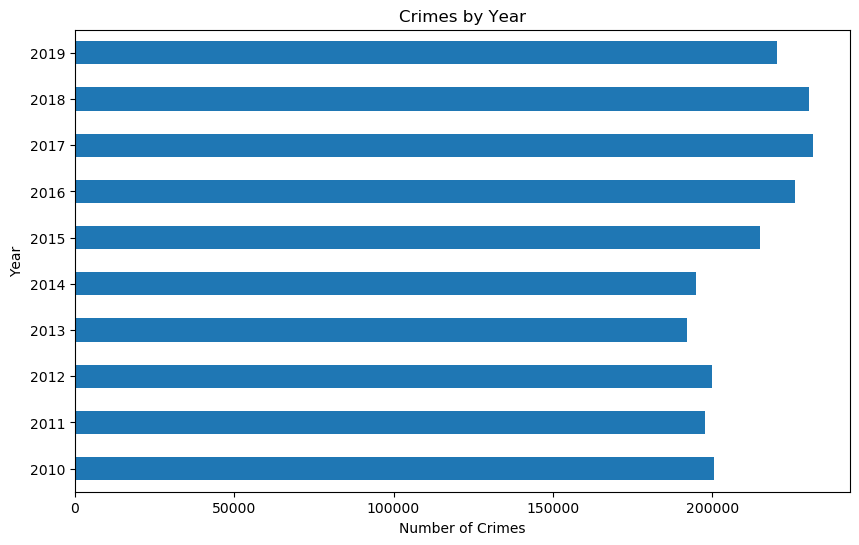

In [10]:
display(Image('../viz/EDA/Crime/crimes_by_year.png'))

Another way to look at the data is to aggregate by the 21 divisions as shown below. PredPol was only deployed in three divisions in 2013, and was later extended to 14 in 2015. By fixing both the years and divisons, we can filter out crimes that could not have been affected by PredPol and thereby reducing noise. For graphs aggregated by year and division, please refer to [Appendix A](#appendix-a)

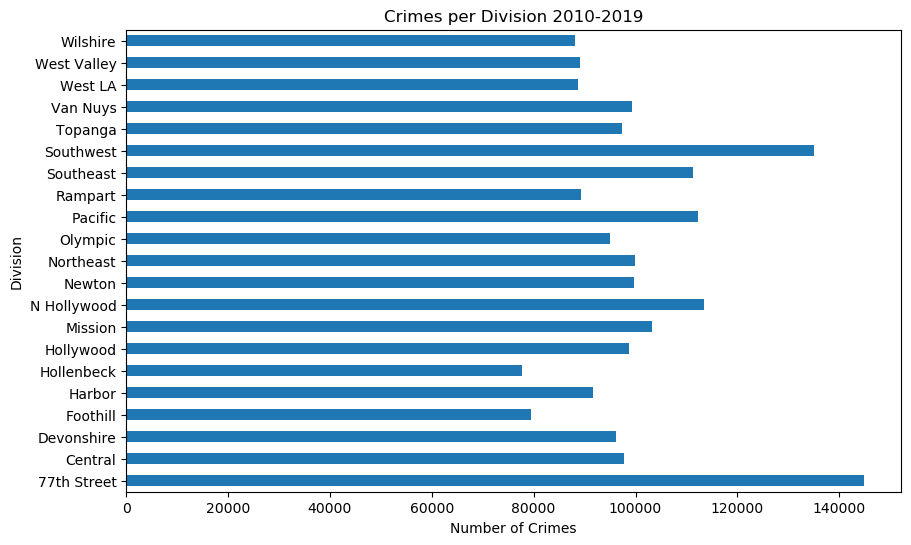

In [11]:
display(Image('../viz/EDA/Crime/crimes_by_area.png'))

The two charts below show the distribution of crimes by their type and severity respectively. Similar to the number of crimes, these two features can be viewed across divisions as well as years. The goal is to identify changes in the distributions in any of the impacted areas before and after the deployment of PredPol. For such changes, further analyses and statistical testings will be performed to minimize possible confounders. 

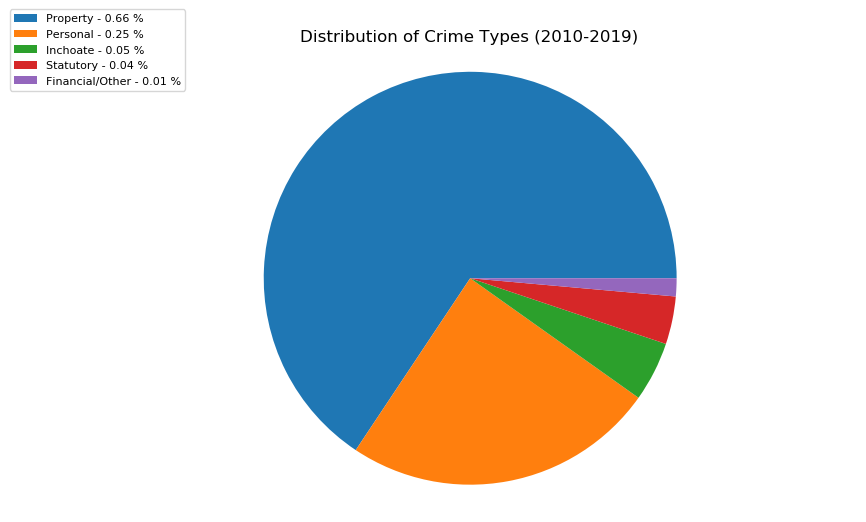

In [15]:
display(Image('../viz/EDA/Crime/tp_distr.png'))

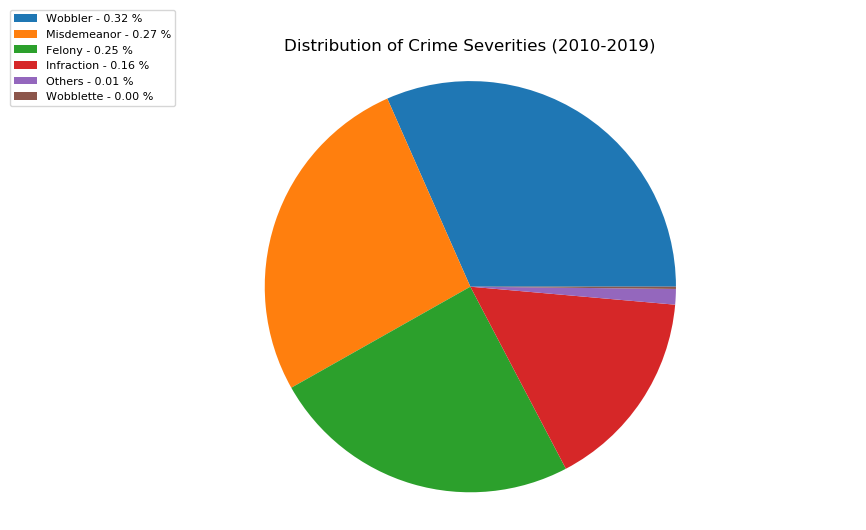

In [13]:
display(Image('../viz/EDA/Crime/sev_distr.png'))

### Stops
The stops data is used to answer multiple questions. The first is whether any change in the number of stops can be associated with the emergence of PredPol. Although more analysis is needed, the graph below shows that there has been a decrease in total number of pedestrian and traffic stops starting from 2014, a year after PredPol was deployed in some areas.

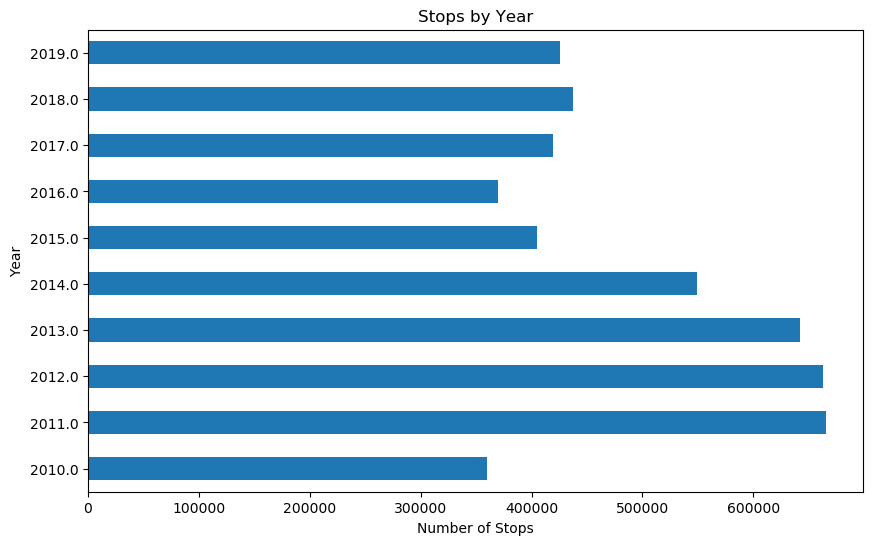

In [24]:
display(Image('../viz/EDA/Stops/stops_by_year.png'))

However, it can be seen that the number of stops are not uniform across all divisions from the graph below. For example, the Central division had more than twice the amount of stops between 2010 and 2019 than West LA, Rampart, North Hollywood, Hollenbeck, and Devonshire. By aggregating the stops by both division and year ([Appendix B](#appendix-b)), it can also be seen while some divisions experienced a decrease in stops such as Central, others experienced an increase like Wilshire. 

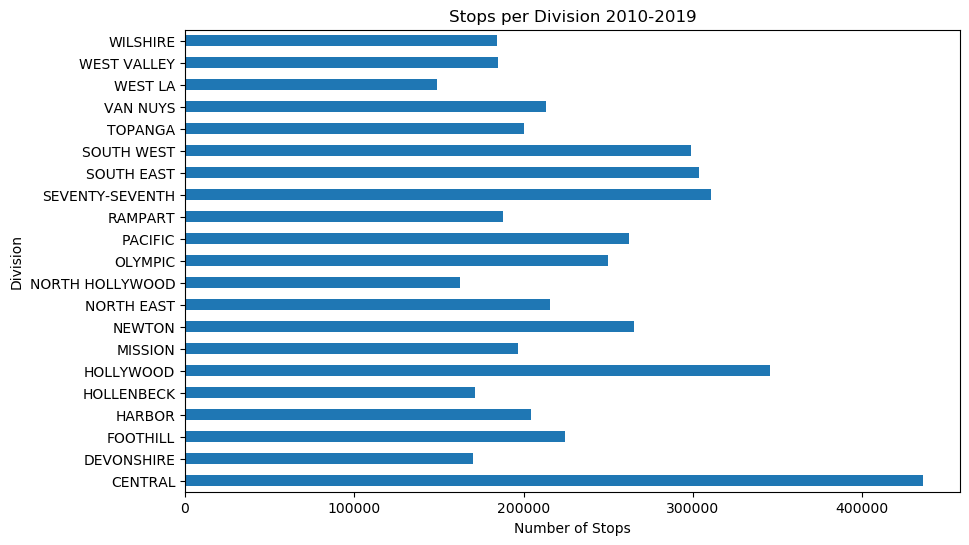

In [25]:
display(Image('../viz/EDA/Stops/stops_by_area.png'))

Furthermore, recall that the stops can be classified into control and treatment groups. Using this as an adiitional variable, we can see whether a division was having more stops due to an increase of reassigned officers. At the same time, we can see whether the divisions that the officers were reassigned from had fewer stops simply because of the lack of police presence.

Another question the stops data is used to tackle is whether there were any disparities between the behavior of reassigned officers and normal officers. This will be done by using the *Post Stop Activity Indicator* feature. 

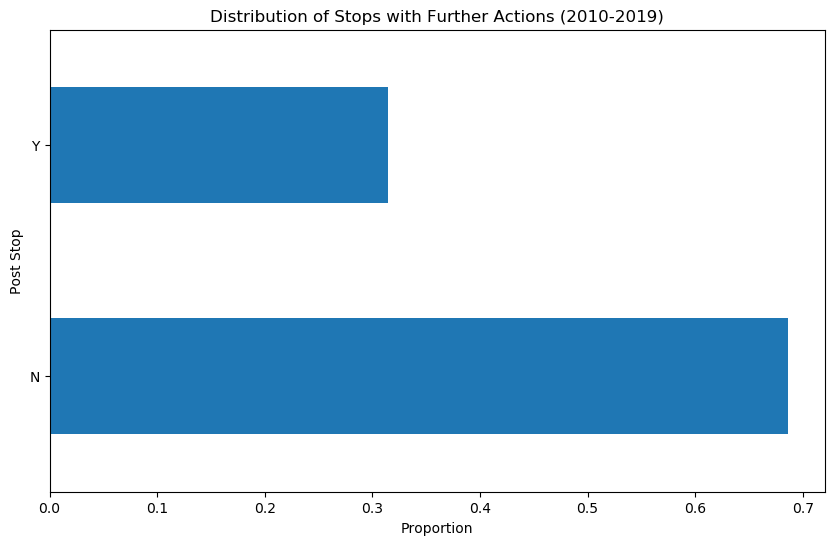

In [28]:
display(Image('../viz/EDA/Stops/ps_distr.png'))

The distribution plot above indicates that in general, most of the stops did not lead to further actions taken by the officers. However, it might not be the case when more variables are taken into account.

### Arrests

## <a name='proposal'>Revisions to proposal</a>
No major changes were made to the proposal. All the analyses will proceed as planned.

## <a name='schedule'>Backlog & Schedule</a>
##### Backlog of Tasks

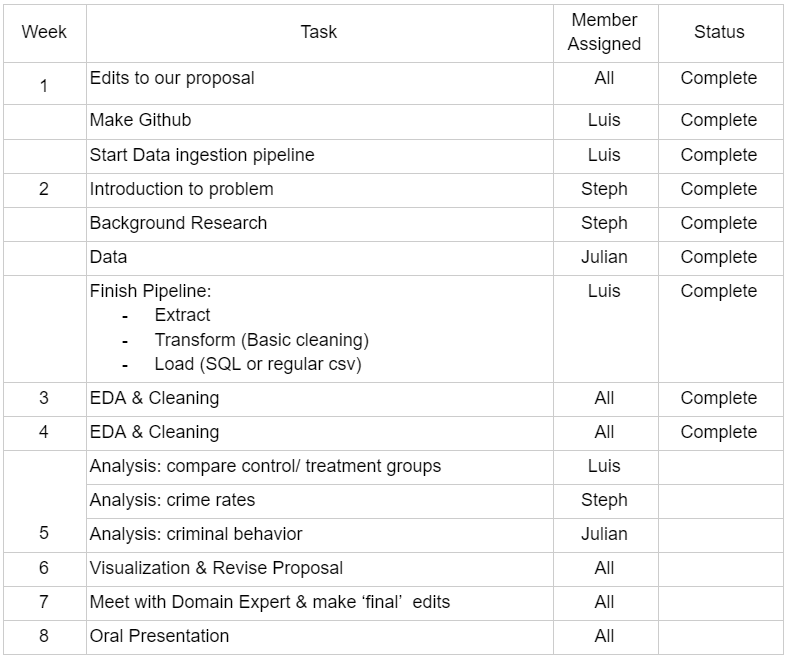

In [29]:
display(Image('backlog.png'))

##### Updated Schedule

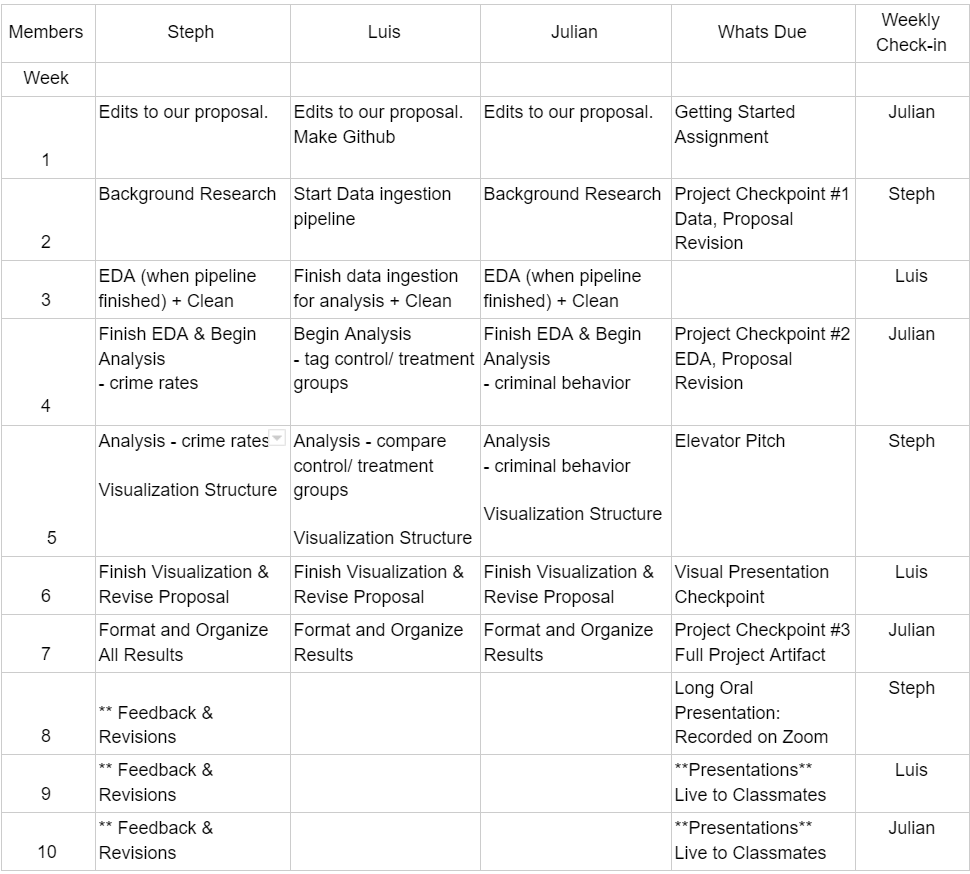

In [30]:
display(Image('sched.png'))

## <a name='references'>References</a>
[1] Types of Criminal Offenses. (2018). Justia. Retrieved 25 April 2020, from https://www.justia.com/criminal/offenses/

# <a name='appendices'>Appendices</a>

## <a name='appendix-a'>Appendix A </a>
##### Number of Crimes by Division each Year

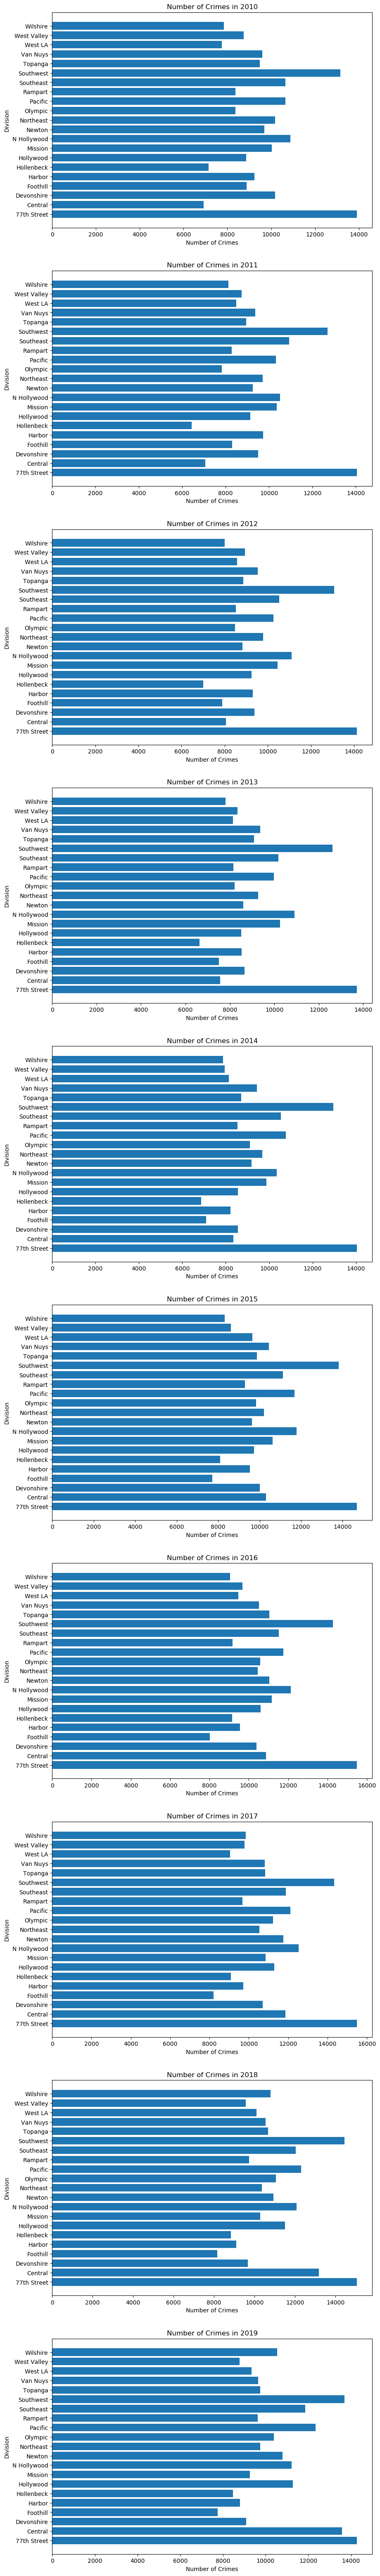

In [12]:
display(Image('../viz/EDA/Crime/crimes_by_area_year.png'))

## <a name='appendix-b'>Appendix B </a>
##### Number of Stops by Division each Year

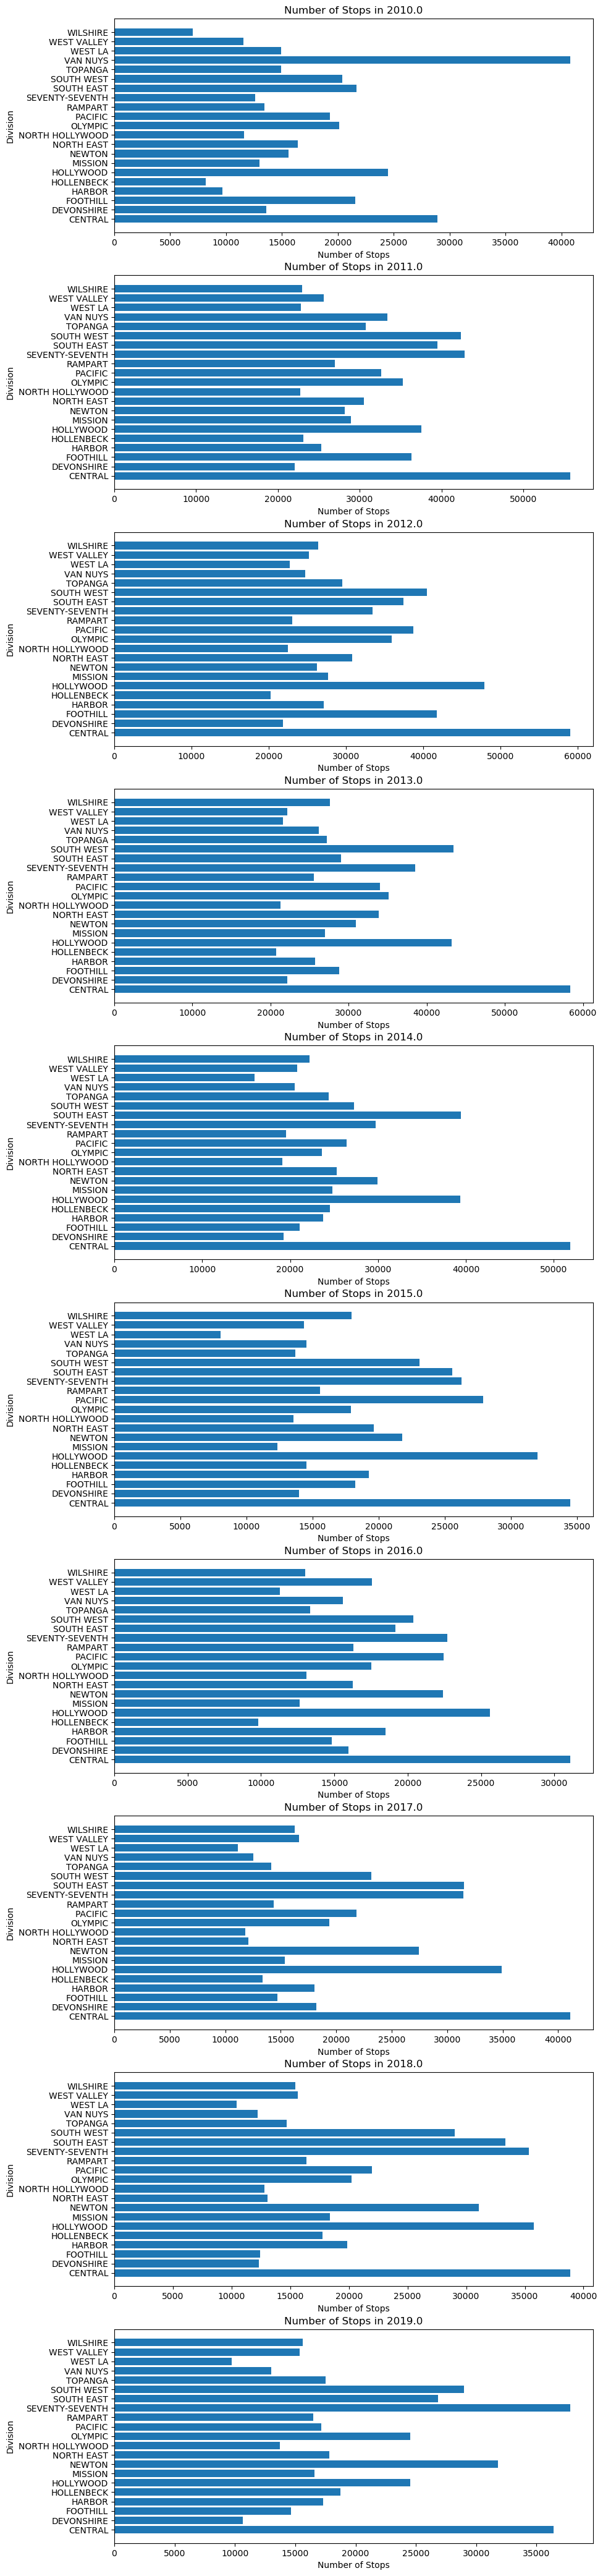

In [26]:
display(Image('../viz/EDA/Stops/stops_by_area_year.png'))